<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Get-the-features-and-target" data-toc-modified-id="Get-the-features-and-target-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the features and target</a></span></li><li><span><a href="#Encode-the-categorical-features" data-toc-modified-id="Encode-the-categorical-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encode the categorical features</a></span></li><li><span><a href="#Encode-the-categorical-target" data-toc-modified-id="Encode-the-categorical-target-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Encode the categorical target</a></span></li><li><span><a href="#Over-sampling" data-toc-modified-id="Over-sampling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Over sampling</a></span></li><li><span><a href="#Train-the-decision-tree" data-toc-modified-id="Train-the-decision-tree-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train the decision tree</a></span></li><li><span><a href="#Plot-the-decision-tree" data-toc-modified-id="Plot-the-decision-tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the decision tree</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Train-the-random-forest" data-toc-modified-id="Train-the-random-forest-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Train the random forest</a></span></li><li><span><a href="#Plot-the-feature-importance-distribution" data-toc-modified-id="Plot-the-feature-importance-distribution-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plot the feature importance distribution</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Discussion</a></span></li></ul></div>

<b>

<p>
<center>
<font size="5">
Machine Learning I (DATS 6202 - O10), Spring 2019
</font>
</center>
</p>

<p>
<center>
<font size="4">
Exercise 5 (Solution)
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Yuxiao Huang
</font>
</center>
</p>

</b>

# Overview
- Apply the sklearn implementation of decision tree and random forest on [Balloons dataset](https://archive.ics.uci.edu/ml/datasets/balloons)
- Complete the missing parts indicated by # Implement me
- Particularly, the code should
    - be bug-free (while the output produced by your solution being the same as the provided output does not necessarily mean your code is bug-free, it is very likely that there is a bug in your code when the two kinds of output are different)
    - be commented

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data
- read the dataset [documentation](https://archive.ics.uci.edu/ml/datasets/balloons), where the rules for generating the data are discussed

In [2]:
import pandas as pd

In [3]:
# Load the yellow-small+adult-stretch dataset of Balloons data
# Implement me
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/yellow-small+adult-stretch.data', 
                 header=None)

# Specify the name of the columns
df.columns = ['color', 'size', 'act', 'age', 'inflated']

# Specify the name of the target
# Implement me
target = 'inflated'

df

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,CHILD,F
6,YELLOW,LARGE,DIP,ADULT,F
7,YELLOW,LARGE,DIP,CHILD,F
8,PURPLE,SMALL,STRETCH,ADULT,T
9,PURPLE,SMALL,STRETCH,CHILD,F


# Get the features and target

In [4]:
# Implement me
X = df.drop(columns=[target])
y = df[target]

# Encode the categorical features

In [5]:
# Print the unique value and their number for each feature
for j in range(X.shape[1]):
    print(X.columns[j] + ':')
    print(X.iloc[:, j].value_counts(), end='\n\n')

color:
YELLOW    8
PURPLE    8
Name: color, dtype: int64

size:
SMALL    8
LARGE    8
Name: size, dtype: int64

act:
DIP        8
STRETCH    8
Name: act, dtype: int64

age:
ADULT    8
CHILD    8
Name: age, dtype: int64



In [6]:
# Encode the features using One-hot-encoding
# Implement me
X = pd.get_dummies(data=X)

# Get the name of the feature-value pairs
feature_value_names = X.columns

X.head()

,color_PURPLE,color_YELLOW,size_LARGE,size_SMALL,act_DIP,act_STRETCH,age_ADULT,age_CHILD
0,0,1,0,1,0,1,1,0
1,0,1,0,1,0,1,0,1
2,0,1,0,1,1,0,1,0
3,0,1,0,1,1,0,0,1
4,0,1,1,0,0,1,1,0


# Encode the categorical target

In [7]:
# Print the unique value and their number for the target
y.value_counts()

F    9
T    7
Name: inflated, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

# Implement me
le = LabelEncoder()
y = le.fit_transform(y)

pd.DataFrame(data=y, columns=[target])[target].value_counts()

0    9
1    7
Name: inflated, dtype: int64

# Over sampling

In [9]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler (with random_state=0)
# Implement me
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X, y)

pd.DataFrame(data=y, columns=[target])[target].value_counts()

1    9
0    9
Name: inflated, dtype: int64

# Train the decision tree

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Create the pipeline with StandardScaler and MyFastLinearRegression
# Implement me
pipe_dt = Pipeline([('StandardScaler', StandardScaler()), ('DecisionTreeClassifier', DecisionTreeClassifier())])

pipe_dt.fit(X, y)

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('DecisionTreeClassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

# Plot the decision tree

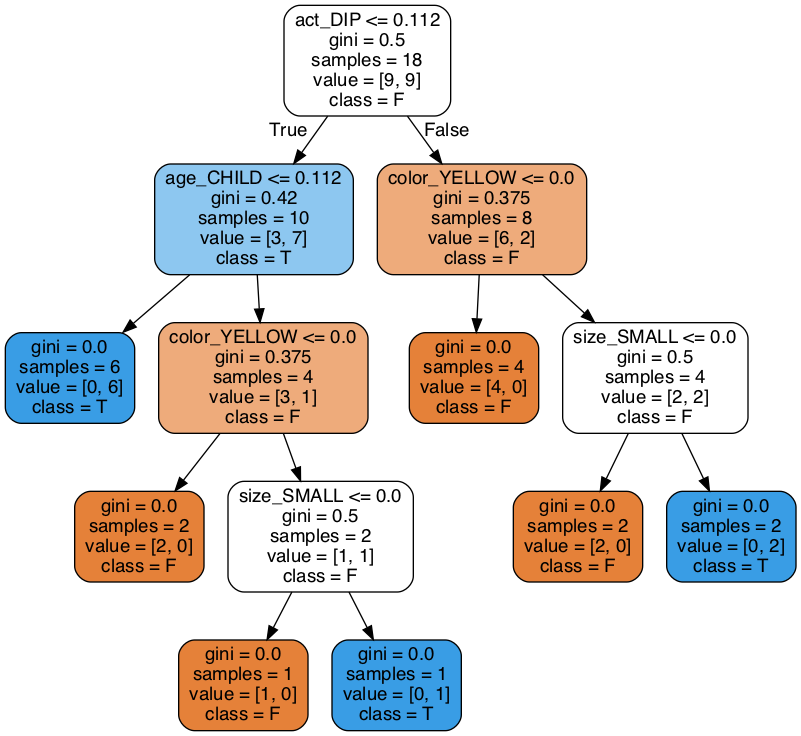

In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(pipe_dt.named_steps['DecisionTreeClassifier'],
                           filled=True, 
                           rounded=True,
                           class_names=['F', 
                                        'T'],
                           feature_names=feature_value_names,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

# Discussion
- What are the rules that generated the data in the yellow-small+adult-stretch dataset?
- can you interpret the rules in the decision tree above?
- are the rules in the decision tree the same as the ones that generated the data?

# Train the random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline with StandardScaler and MyFastLinearRegression
# Implement me
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())])

pipe_rf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

# Plot the feature importance distribution

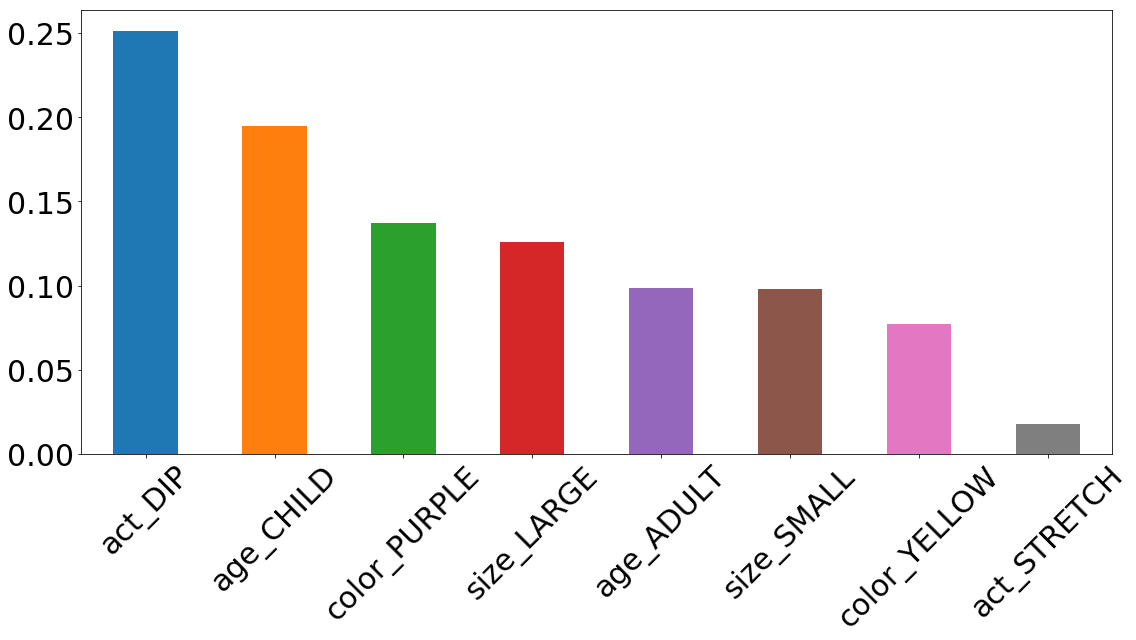

In [13]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, feature_value_names)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

# Discussion
- What is the problem of feature importances provided by random forest?